In [16]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import col, countDistinct, sumDistinct
import pandas

import seaborn as sns
import matplotlib.pyplot as plt
import os, re
import itertools

from pyspark.sql import SQLContext


from pyspark.sql.functions import lit, regexp_extract
#https://seaborn.pydata.org/tutorial/distributions.html

In [5]:
spark = SparkSession.builder.appName("Test").getOrCreate()
spark


In [6]:
dir=os.listdir('/Users/felix.baertschi/Documents/Dev/school/excel/')

In [7]:
#Load Excel
pdf000 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2020-12-10_1608_TestName_0000_0000.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf001 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2020-12-22_2304_TestName_0000_0001.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf002 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-01-04_0535_TestName_0000_0002.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf003 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-01-16_1152_TestName_0000_0003.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf004 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-01-28_1812_TestName_0000_0004.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf005 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-02-10_0038_TestName_0000_0005.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf006 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-02-22_0701_TestName_0000_0006.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf007 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-03-06_1326_TestName_0000_0007.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf008 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-03-18_1952_TestName_0000_0008.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf009 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-03-31_0317_TestName_0000_0009.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf010 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-04-12_0934_TestName_0000_0010.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf011 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-04-24_1549_TestName_0000_0011.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf012 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-05-06_2209_TestName_0000_0012.xlsx', sheet_name='DO Load Analysis - Single Ch')
pdf013 = pandas.read_excel('/Users/felix.baertschi/Documents/Dev/school/excel/2021-05-19_0423_TestName_0000_0013.xlsx', sheet_name='DO Load Analysis - Single Ch')

In [8]:
#convert pandas df to spark df
df000 = spark.createDataFrame(pdf000)
df001 = spark.createDataFrame(pdf001)
df002 = spark.createDataFrame(pdf002)
df003 = spark.createDataFrame(pdf003)
df004 = spark.createDataFrame(pdf004)
df005 = spark.createDataFrame(pdf005)
df006 = spark.createDataFrame(pdf006)
df007 = spark.createDataFrame(pdf007)
df008 = spark.createDataFrame(pdf008)
df009 = spark.createDataFrame(pdf009)
df010 = spark.createDataFrame(pdf010)
df011 = spark.createDataFrame(pdf011)
df012 = spark.createDataFrame(pdf012)
df013 = spark.createDataFrame(pdf013)

In [10]:
#merge df's
unionDF000 = df000.union(df001)
unionDF001 = unionDF000.union(df002)
unionDF002 = unionDF001.union(df003)
unionDF003 = unionDF002.union(df004)
unionDF004 = unionDF003.union(df005)
unionDF005 = unionDF004.union(df006)
unionDF006 = unionDF005.union(df007)
unionDF007 = unionDF006.union(df008)
unionDF008 = unionDF007.union(df009)
unionDF009 = unionDF008.union(df010)
unionDF010 = unionDF009.union(df011)
unionDF011 = unionDF010.union(df012)
unionDF = unionDF011.union(df013)

In [13]:
#show schema
unionDF.printSchema()
unionDF.show(truncate=False)

root
 |-- SUT_ID: string (nullable = true)
 |-- Module Type: string (nullable = true)
 |-- Channel: string (nullable = true)
 |-- Write Value: double (nullable = true)
 |-- Read Value: double (nullable = true)
 |-- Higher Limit: double (nullable = true)
 |-- Lower Limit: double (nullable = true)
 |-- Delta: double (nullable = true)
 |-- Result: long (nullable = true)
 |-- Date Time: timestamp (nullable = true)
 |-- Ambient Tempr: double (nullable = true)
 |-- TestBox Tempr: double (nullable = true)
 |-- 24V Fix: double (nullable = true)
 |-- 36V Fix: double (nullable = true)
 |-- Logic Supply: double (nullable = true)
 |-- Load Supply: double (nullable = true)

+------+-----------+----------------+-----------+----------+------------+-----------+------+------+-----------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+
|SUT_ID|Module Type|Channel         |Write Value|Read Value|Higher Limit|Lower Limit|Delta |Re

In [32]:
#count all the different modules
unionDF.select("Module Type").distinct().show(truncate=False)

+-----------+
|Module Type|
+-----------+
|DOT309-TF  |
+-----------+



In [15]:
unionDF[['Delta']].describe().show()

+-------+--------------------+
|summary|               Delta|
+-------+--------------------+
|  count|             2828640|
|   mean|-0.05998757282651721|
| stddev| 0.04852970633118158|
|    min|               -0.23|
|    max|               0.092|
+-------+--------------------+



In [31]:
#quantile
unionDF.approxQuantile("Delta", [0.95,0.75,0.5,0.25,0.05], 0.25)

[0.092, 0.092, -0.082, -0.23, -0.23]

In [33]:
unionDF.count()

2828640

In [39]:
#create sample DF
sdfsample = unionDF.select(['Write Value', 'Read Value', 'Delta', 'Module Type', 'Channel']).sample(False,fraction=0.1, seed=3)#Only AIT
pdfsample = sdfsample.toPandas()

In [40]:
pdfsample.count()

Write Value    282797
Read Value     282797
Delta          282797
Module Type    282797
Channel        282797
dtype: int64

In [41]:
pdfsample.head()

,Write Value,Read Value,Delta,Module Type,Channel
0,23.966,23.863,-0.103,DOT309-TF,%QX3.1.5.2@300mA
1,23.966,23.920,-0.046,DOT309-TF,%QX3.1.5.5@30mA
2,23.966,23.899,-0.067,DOT309-TF,%QX3.1.5.5@90mA
3,23.966,23.888,-0.078,DOT309-TF,%QX3.1.5.5@120mA
4,23.966,23.853,-0.113,DOT309-TF,%QX3.1.5.5@210mA


In [53]:
#Extract mA out from Channel from all types
pattern = """^%.*@([0-9]+)mA"""
sdf_mA=unionDF.select(
    col("Module Type"),
    col("Channel"),
    regexp_extract(col("Channel"), pattern, 1).alias("Current"),
    col("Delta"),
    col("Write Value"),
    col("Read Value")
    )

In [54]:
#create sample
sdfsample_mA = sdf_mA.select(['Write Value', 'Read Value', 'Delta', 'Module Type', 'Channel', 'Current']).sample(False,fraction=0.1, seed=3)#Only AIT
pdfsample_mA = sdfsample_mA.toPandas()
pdfsample_mA.head()

,Write Value,Read Value,Delta,Module Type,Channel,Current
0,23.966,23.863,-0.103,DOT309-TF,%QX3.1.5.2@300mA,300
1,23.966,23.920,-0.046,DOT309-TF,%QX3.1.5.5@30mA,30
2,23.966,23.899,-0.067,DOT309-TF,%QX3.1.5.5@90mA,90
3,23.966,23.888,-0.078,DOT309-TF,%QX3.1.5.5@120mA,120
4,23.966,23.853,-0.113,DOT309-TF,%QX3.1.5.5@210mA,210


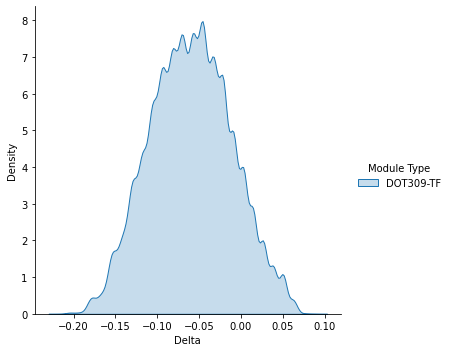

In [42]:
#All
sns.displot(pdfsample, x="Delta", hue="Module Type", kind="kde",fill=True)

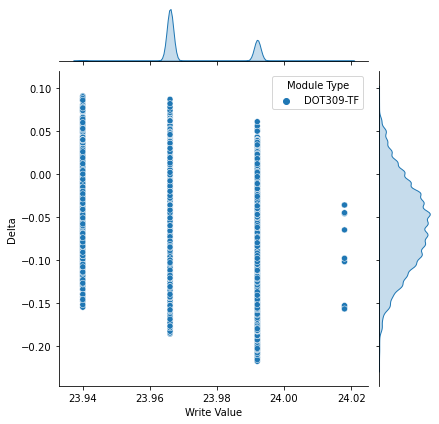

In [43]:
sns.jointplot(data=pdfsample, x="Write Value", y="Delta", hue="Module Type")

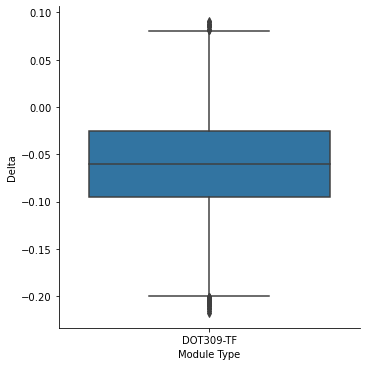

In [44]:
sns.catplot(x="Module Type", y="Delta", kind="box", data=pdfsample)

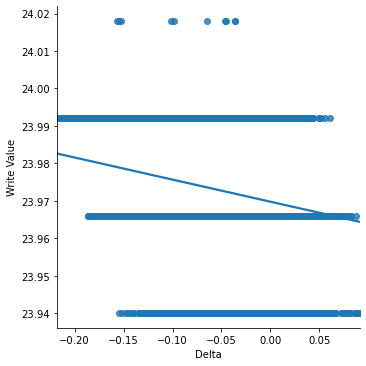

In [45]:
sns.lmplot(y = 'Write Value', x = 'Delta', data=pdfsample)

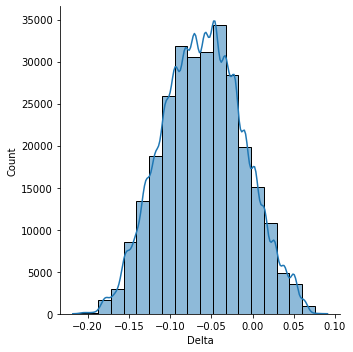

In [48]:
sns.displot(pdfsample, x="Delta", bins=20, kde=True)

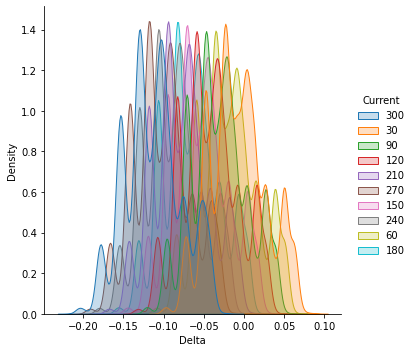

In [57]:
#current
sns.displot(pdfsample_mA, x="Delta", hue="Current", kind="kde",fill=True)

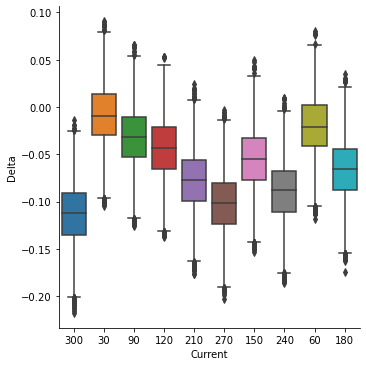

In [58]:
#current
sns.catplot(x="Current", y="Delta", kind="box", data=pdfsample_mA)

In [83]:
#get only one value
sdf_mA_one=sdf_mA.where("Current == '300'or Current == '180'")
#create sample
sdfsample_mA_one = sdf_mA_one.select(['Write Value', 'Read Value', 'Delta', 'Module Type', 'Channel', 'Current']).sample(False,fraction=0.1, seed=3)#Only AIT
#transform to pandas df
pdfsample_mA_one = sdfsample_mA_one.toPandas()
pdfsample_mA_one.head()



,Write Value,Read Value,Delta,Module Type,Channel,Current
0,23.966,23.855,-0.111,DOT309-TF,%QX3.1.5.14@300mA,300
1,23.992,23.908,-0.084,DOT309-TF,%QX3.1.5.9@180mA,180
2,23.966,23.915,-0.051,DOT309-TF,%QX3.1.5.10@180mA,180
3,23.966,23.870,-0.096,DOT309-TF,%QX3.1.5.10@300mA,300
4,23.966,23.865,-0.101,DOT309-TF,%QX3.1.5.12@180mA,180


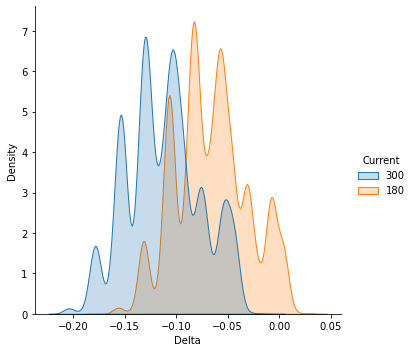

In [84]:
#current
sns.displot(pdfsample_mA_one, x="Delta", hue="Current", kind="kde",fill=True)